In [2]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cmocean.cm

In [4]:
# Emanuel Vulnerability Curves

# V = wind speed
V = np.arange(0,501,1)

# Vthresh = windspeed at and below which no damage occurs
Vthresh = 25.7 # 50 kts / 1.944 kts per m/s

# Vhalf = windspeed at which half the property value is lost
Vhalf1 = 89.21692660848132
Vhalf2 = 83.97114168486657

def vcurve(V,Vthresh,Vhalf):
    vn = np.zeros(np.shape(V))
    for i in range(len(V)):
        vn[i] = np.max([V[i]-Vthresh,0])/(Vhalf-Vthresh)
    # f = fraction of property value lost
    f = vn**3/(1+vn**3)
    return f

f1 = vcurve(V,Vthresh,Vhalf1)
f2 = vcurve(V,Vthresh,Vhalf2)

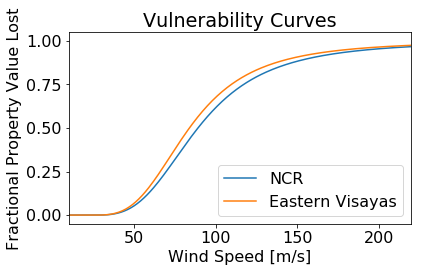

In [14]:
plt.rcParams.update({'font.size': 16})
plt.plot(V,f1,label='NCR')
plt.plot(V,f2,label='Eastern Visayas')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Fractional Property Value Lost')
plt.title('Vulnerability Curves')
plt.legend()
plt.xlim([10,220])
plt.tight_layout()
plt.savefig('FIGURES/vulnerabilitycurves.png',dpi=400)
